In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fft2, ifft2
from io import BytesIO

True


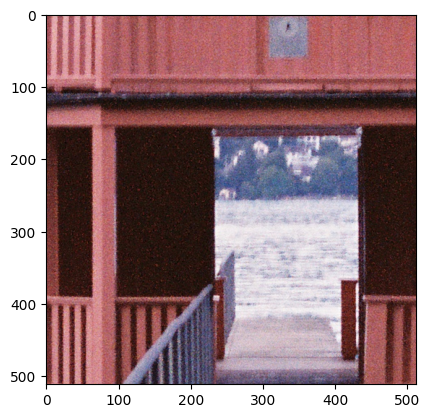

In [40]:
with open('resources/img.shape', "rb") as f:
    shape = int.from_bytes(f.read(4), 'little'), int.from_bytes(f.read(4), 'little')

img_r = np.fromfile('resources/img_r.mat', dtype=np.uint8).reshape(shape)
img_g = np.fromfile('resources/img_g.mat', dtype=np.uint8).reshape(shape)
img_b = np.fromfile('resources/img_b.mat', dtype=np.uint8).reshape(shape)

print(np.any(img_r!=img_g))

img = np.array([img_b, img_g, img_r]).transpose((1, 2, 0))

plt.imshow(img)
plt.show()

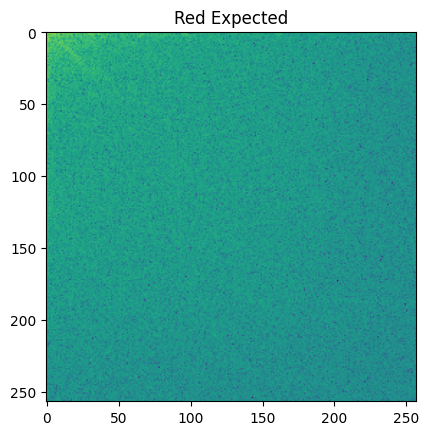

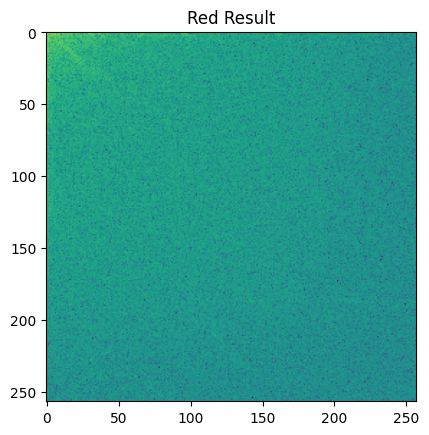

In [42]:
rows, cols = shape
fft_r = np.fromfile('output/fft_r.mat', dtype=np.float32).reshape(shape)
fft_g = np.fromfile('output/fft_g.mat', dtype=np.float32).reshape(shape)
fft_b = np.fromfile('output/fft_b.mat', dtype=np.float32).reshape(shape)

expected_fft_r = fft2(img_r)
expected_fft_g = fft2(img_g)
expected_fft_b = fft2(img_b)

plt.imshow(np.log(np.abs(np.real(expected_fft_r)[:rows//2+1, :cols//2+1])))
plt.title('Red Expected')
plt.show()

plt.imshow(np.log(np.abs(fft_r[:rows//2+1, :cols//2+1])))
plt.title('Red Result')
plt.show()